In [1]:
import dill
from main.manipulation import Manipulation
from main.data_processing import evaluate_profile
import pandas as pd
import numpy as np
from main.manipulation_utils import get_children_generation_options, check_transitivity, one_cost_children_generation, useful_change
from IPython.display import display
from copy import copy
from matplotlib import pyplot as plt
import seaborn as sns
import os

In [2]:
# for num_alt in 3 5 7
# do
#     for d_type in "2urn" "ic"
#     do 
#         for num_vot in 10 20 50
#         do
#             python orchestration.py --num_alt ${num_alt} --num_voter ${num_vot} --data_type ${d_type}
#         done
#     done
# done

## data load and set-up

In [3]:
if os.path.isfile('data/results/total_result.pkl'):
    with open('data/results/total_result.pkl', 'rb') as f:
        total_result = dill.load(f)

In [4]:
data_df = pd.DataFrame(total_result).T
data_df.columns = ['convergence', 'result']

In [5]:
data_df

convergence  \
3 10 2urn 5   1 approval 100 1 True True True        True   
     ic   0   1 approval 100 0 True True True        True   
                             1 True True True        True   
                             2 True True True        True   
          1   1 approval 100 0 True True True        True   
...                                                   ...   
  50 ic   195 2 approval 100 0 True True True        True   
          196 2 approval 100 0 True True True        True   
          197 2 approval 100 0 True True True        True   
          198 2 approval 100 0 True True True        True   
          199 2 approval 100 0 True True True        True   

                                                                                          result  
3 10 2urn 5   1 approval 100 1 True True True                                                 {}  
     ic   0   1 approval 100 0 True True True                                                 {}  
                             1 True True True                                                 {}  
                             2 True True True                                                 {}  
          1   1 approval 100 0 True True True                                                 {}  
...                                                                                          ...  
  50 ic   195 2 approval 100 0 True True True  {0: (2, 35), 1: (1, 45), 2: (2, 33), 3: (0, 25...  
          196 2 approval 100 0 True True True                                                 {}  
          197 2 approval 100 0 True True True                                                 {}  
          198 2 approval 100 0 True True True                                                 {}  
          199 2 approval 100 0 True True True                                                 {}  

[5201 rows x 2 columns]

In [6]:
k = 2
method = 'approval'
cycle_limit = 100

In [14]:
means = []
stds = []
inds = []
for num_alt in [3, 5, 7]:
    for d_type in ["2urn", "ic"]:
        for num_vot in [10, 20, 50]:
            dft = data_df.loc[(num_alt, num_vot, d_type, slice(None), k, method, cycle_limit, 0, True, True, True)]
            convergence_rounds = dft['result'].apply(lambda d: max(d.keys())+1 if d else 0)
            
            inds.append((num_alt, num_vot, d_type))
            means.append(convergence_rounds.mean())
            stds.append(convergence_rounds.std())
            
            print(f'k: {k}, num_alt: {num_alt}, num_vot: {num_vot}, d_type: {d_type}: percent of converged {dft["convergence"].max()*100}%, convergence rounds: mean={convergence_rounds.mean()}, max={convergence_rounds.max()}, std={convergence_rounds.std():.2f}')

k: 2, num_alt: 3, num_vot: 10, d_type: 2urn: percent of converged 100%, convergence rounds: mean=1.095, max=11, std=1.80
k: 2, num_alt: 3, num_vot: 20, d_type: 2urn: percent of converged 100%, convergence rounds: mean=1.925, max=23, std=3.07
k: 2, num_alt: 3, num_vot: 50, d_type: 2urn: percent of converged 100%, convergence rounds: mean=2.055, max=27, std=4.23
k: 2, num_alt: 3, num_vot: 10, d_type: ic: percent of converged 100%, convergence rounds: mean=1.34, max=8, std=1.73
k: 2, num_alt: 3, num_vot: 20, d_type: ic: percent of converged 100%, convergence rounds: mean=2.915, max=16, std=3.76
k: 2, num_alt: 3, num_vot: 50, d_type: ic: percent of converged 100%, convergence rounds: mean=4.125, max=30, std=7.09
k: 2, num_alt: 5, num_vot: 10, d_type: 2urn: percent of converged nan%, convergence rounds: mean=nan, max=nan, std=nan
k: 2, num_alt: 5, num_vot: 20, d_type: 2urn: percent of converged nan%, convergence rounds: mean=nan, max=nan, std=nan
k: 2, num_alt: 5, num_vot: 50, d_type: 2urn:

In [8]:
df = pd.DataFrame({'means': means, 'stds': stds}, index=pd.MultiIndex.from_tuples(inds, names=['num_alt', 'num_vot', 'd_type'])).reset_index()

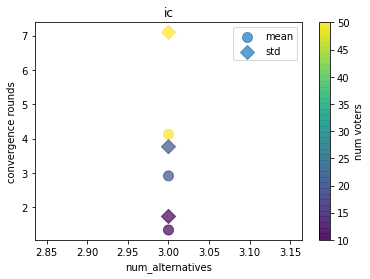

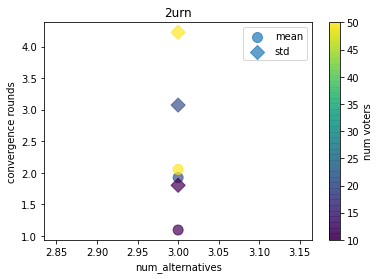

In [12]:
for d_type in ['ic', '2urn']:
    dft = df[df['d_type']==d_type]
    plt.scatter(dft['num_alt'], dft['means'], c=dft['num_vot'], s =100, alpha=0.7, label='mean')
    plt.scatter(dft['num_alt'], dft['stds'], c=dft['num_vot'], s =100, marker='D', alpha=0.7, label='std')
    plt.title(d_type)
    plt.legend()
    plt.xlabel('num_alternatives')
    plt.ylabel('convergence rounds')
    cbar = plt.colorbar()
    cbar.set_label('num voters')
    plt.show()

In [68]:
num_voters = 10
num_alt = 5
data_type = 'ic'

assert num_voters in [10, 20, 50]
assert num_alt in [3, 5, 7]
assert data_type in ['2urn', 'ic']
alphabetical_order = {}
for i in range(num_alt):
    alphabetical_order[i] = i

In [70]:
cycle_limit=15

In [71]:
k=1
method='approval'

In [ ]:
for random_choice in range(200):
    all_preferences = all_data[(num_voters, num_alt, data_type)][random_choice]
    

In [13]:

convergence_rounds = []
for meta_counter in range(1):
    
    current_profile = copy(all_preferences) # Initialize the current profile of preferences for all voters.to be the same as the truthful profile.
    num_rounds = 0
    failed_manipulators = []
    manipulator_voter=None

    while True:
        random_voter = select_new_random_voter(failed_manipulators, len(all_preferences), manipulator_voter)
        if random_voter is None:
            print(f'Convergence is achieved in {num_rounds} rounds!')
            convergence_rounds.append(num_rounds)
            break
        else:
            pass
#             print(f'\nRandom voter chosen: {random_voter}')

        winner, possible_winners, scores_of_alternatives = evaluate_profile(graphs=current_profile, k=k, method=method, alphabetical_order=alphabetical_order)

        man = Manipulation(
            all_preferences=current_profile,
            preference_idx=random_voter,
            winner=winner,
            truthful_profile=all_preferences,
            possible_winners=possible_winners,
            scores_of_alternatives=scores_of_alternatives,
            alphabetical_order_of_alternatives=alphabetical_order,
            method=method,
            k=k,
            do_additions=True,
            do_omissions=True,
            do_flips=True,
            verbose=False
        )

        result = man.manipulation_move()
        if result is not None:
            current_profile, _ = result
            num_rounds+=1
            if num_rounds > cycle_limit:
                print(f'No convergence for {cycle_limit} rounds. Assumed a cycle.')
                continue
            manipulator_voter=random_voter
        else:
#             print(f'Voter: {random_voter} cannot manipulate.')
            failed_manipulators.append(random_voter)

Convergence is achieved in 0 rounds!
Convergence is achieved in 0 rounds!
Convergence is achieved in 0 rounds!
Convergence is achieved in 0 rounds!
Convergence is achieved in 0 rounds!
Convergence is achieved in 0 rounds!
Convergence is achieved in 0 rounds!
Convergence is achieved in 0 rounds!
Convergence is achieved in 0 rounds!
Convergence is achieved in 0 rounds!
Convergence is achieved in 0 rounds!
Convergence is achieved in 0 rounds!
Convergence is achieved in 0 rounds!
Convergence is achieved in 0 rounds!
Convergence is achieved in 0 rounds!
Convergence is achieved in 0 rounds!
Convergence is achieved in 0 rounds!
Convergence is achieved in 0 rounds!
Convergence is achieved in 0 rounds!
Convergence is achieved in 0 rounds!
Convergence is achieved in 0 rounds!
Convergence is achieved in 0 rounds!
Convergence is achieved in 0 rounds!
Convergence is achieved in 0 rounds!
Convergence is achieved in 0 rounds!
Convergence is achieved in 0 rounds!
Convergence is achieved in 0 rounds!
C

Convergence is achieved in 0 rounds!
Convergence is achieved in 0 rounds!
Convergence is achieved in 0 rounds!
Convergence is achieved in 0 rounds!
Convergence is achieved in 0 rounds!
Convergence is achieved in 0 rounds!
Convergence is achieved in 0 rounds!
Convergence is achieved in 0 rounds!
Convergence is achieved in 0 rounds!
Convergence is achieved in 0 rounds!
Convergence is achieved in 0 rounds!
Convergence is achieved in 0 rounds!
Convergence is achieved in 0 rounds!
Convergence is achieved in 0 rounds!
Convergence is achieved in 0 rounds!
Convergence is achieved in 0 rounds!
Convergence is achieved in 0 rounds!
Convergence is achieved in 0 rounds!
Convergence is achieved in 0 rounds!
Convergence is achieved in 0 rounds!
Convergence is achieved in 0 rounds!
Convergence is achieved in 0 rounds!
Convergence is achieved in 0 rounds!
Convergence is achieved in 0 rounds!
Convergence is achieved in 0 rounds!
Convergence is achieved in 0 rounds!
Convergence is achieved in 0 rounds!
C

Convergence is achieved in 0 rounds!
Convergence is achieved in 0 rounds!
Convergence is achieved in 0 rounds!
Convergence is achieved in 0 rounds!
Convergence is achieved in 0 rounds!
Convergence is achieved in 0 rounds!
Convergence is achieved in 0 rounds!
Convergence is achieved in 0 rounds!
Convergence is achieved in 0 rounds!
Convergence is achieved in 0 rounds!
Convergence is achieved in 0 rounds!
Convergence is achieved in 0 rounds!
Convergence is achieved in 0 rounds!
Convergence is achieved in 0 rounds!
Convergence is achieved in 0 rounds!
Convergence is achieved in 0 rounds!
Convergence is achieved in 0 rounds!
Convergence is achieved in 0 rounds!
Convergence is achieved in 0 rounds!
Convergence is achieved in 0 rounds!
Convergence is achieved in 0 rounds!
Convergence is achieved in 0 rounds!
Convergence is achieved in 0 rounds!
Convergence is achieved in 0 rounds!
Convergence is achieved in 0 rounds!
Convergence is achieved in 0 rounds!
Convergence is achieved in 0 rounds!
C

In [14]:
np.mean(convergence_rounds)

0.0

In [15]:
np.std(convergence_rounds)

0.0

/Users/panos/anaconda3/envs/iterative_voting/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/panos/anaconda3/envs/iterative_voting/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


<AxesSubplot:ylabel='Density'>

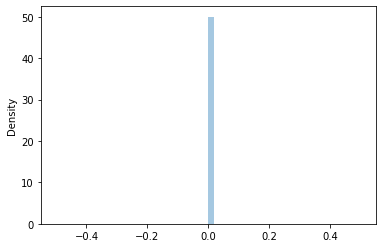

In [16]:
sns.distplot(convergence_rounds, bins=50)